# **Exercise Sheet 6:** Deep Learning

# Part A: Foundations & Concepts

Before you start coding and building deep learning models, take some time to consider the fundamental concepts and motivations behind neural networks and deep learning techniques.

Reflect on these ideas independently before consulting resources like ChatGPT or other online tools. Discussing your thoughts with classmates is also highly encouraged!

## 1. Deep learning neurons and activiation functions

### a) Draw a simple deep learning neuron
- The neuron receives three inputs: [3, 5, 2]
- The weights are: [2, 1, 0.5]
- There is a bias: 2
- How is the output computed (not considering an activiation function)?

#### Your Answer:

#### Solution:

The output of the neuron is calculated step by step as follows:

| Input ($x_i$) | Weight ($w_i$) | Product ($x_i \times w_i$) |
|:---------------:|:----------------:|:----------------------------:|
| 3               | 2                | 6                            |
| 5               | 1                | 5                            |
| 2               | 0.5              | 1                            |
| **Bias**        |                  | 2                            |
| **Total**       |                  | **14**                       |

In formula form:

$$
\text{output} = (3 \times 2) + (5 \times 1) + (2 \times 0.5) + 2 = 6 + 5 + 1 + 2 = 14
$$

### b) What is the output if we add a ReLU activation function?

*Note:* If you were not able to compute the output in the previous question, continue with 10 for the output.

$$
\text{ReLU}(x) = \max(0, x)
$$
![ReLU Function](imgs/Simple_ReLU.png)

#### Your Answer:

#### Solution:
In classic neural networs, the activiation function is applied after aggregating the weighted inputs and adding the bias, leading to the forumla:

$$
\text{output} = \text{activitation}\left(\sum_{i=1}^{n} (x_i \cdot w_i) + b\right)
$$

The ReLU activation function outputs the maximum of 0 and the input value. Therefore, if the output from the previous step is 14, applying ReLU gives:
$$
\text{ReLU}(14) = \max(0, 14) = 14
$$

### c) What would the output be after the activiation function with the new parameters?
- Input: [4, 2.5, 1.7]
- Weights: [-1.5, 1.8, 0.2]
- Bias: -2

#### Your Answer

#### Solution

| Input ($x_i$) | Weight ($w_i$) | Product ($x_i \times w_i$) |
|:-------------:|:--------------:|:--------------------------:|
| 4             | -1.5           | -6.0                       |
| 2.5           | 1.8            | 4.5                        |
| 1.7           | 0.2            | 0.34                       |
| **Bias**      |                | -2                         |
| **Total (before activation)** | | **-3.16**                 |
| **ReLU Output** |              | $\max(0, -3.16) = 0$       |

The output is 0.

### d) How can we build complex function (such as waves) out of this simple function?
- What do you need to achieve this?
- How do positive and negative weights and their value manipulate the function?
- What does changing the bias influence?

#### Your Answer:

#### Solution:
- To build complex functions like waves, we can stack multiple neurons (layers) together.
- Positive/Negative weights: Control direction of the diagonal ReLU segment
- Higher/Lower weights: Control steepness of the diagonal segment
- Bias: Shifts the start of the segment

By combining many ReLU's with different weights and biases, we can approximate complex functions ussch as curves and waveforms.

### e) How many ReLU's are needed to fit this line?

![ReLU Line](imgs/Stacked_ReLU.png)

#### Your Answer:

#### Solution
We need 3 ReLU's to fit this line. One for the first ascend, another one that balances it once it gets flat and a third that lets it descend.

### f) Take a pen and draw the ReLU functions that we need to fit the line above.

#### Your Answer:

#### Solution

![ReLU Functions](imgs/individual_ReLU.png)

## 2. Loss and Gradient Descent

### a) What does a loss function reflect? What is a possible loss function for Linear regression?


#### Your Answer:

#### Solution:
- The loss function reflects the difference between the prediction and actual outcome that we aim to minimize.
- In linear regression, the most common loss function is ordinary least squares (OLS), which minimizes the sum of squared errors (SSE) between the predicted values and the actual data points. This is also known as Mean Squared Error (MSE) when averaged over all points.

### b) Conceptually, what does the loss in binary classification aims to minimize?

#### Your Answer:

#### Solution:
- In binary classification, the loss function aims to minimize the difference between the predicted probabilities of the two classes and the actual class labels. So for class 1, the predicted probability should be close to 1, and for class 0 vice versa.

### c) Look at the loss landscape below and indicate where the minimal loss is located.

![Loss Landscape](imgs/loss_landscape.png)

#### Your Anwer:

#### Solution:

Note maybe we update this for better teaching opportunities

In general it's difficult to get the value reliably from the 3d plot, however the contour plot is easier to interpret. We see tha there are three regions with low loss (around (1.5, -2.5), (1.5, 2.5) and (-1.5, 0)). The Minimum is found around (-1.5, 0).

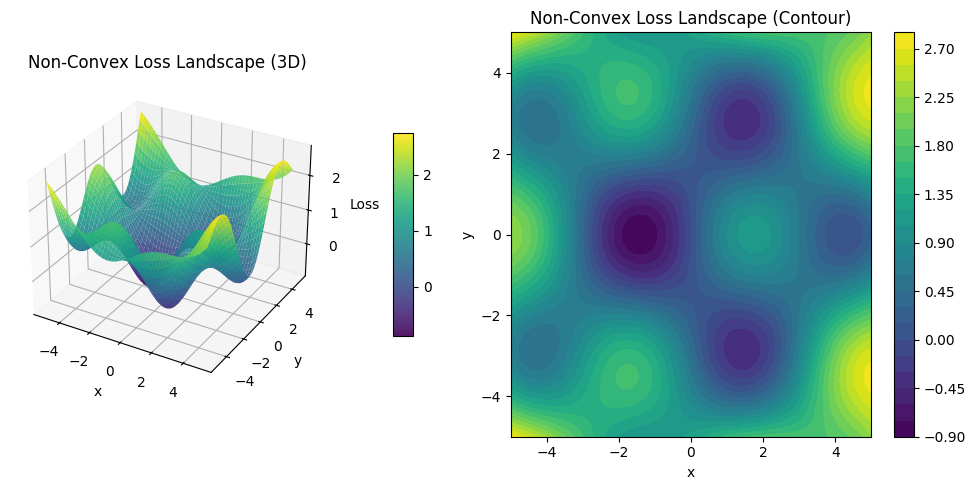

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create a non-convex loss function (e.g., a "double well" or Rastrigin-like)
def loss(x, y):
    return np.sin(x) * np.cos(y) + 0.05 * (x**2 + y**2)

# Generate grid
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = loss(X, Y)

# 3D Surface Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)
ax.set_title('Non-Convex Loss Landscape (3D)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Loss')
cbar3d = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, pad=0.15)
#cbar3d.set_label('Loss Value')

# Contour Plot
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contourf(X, Y, Z, levels=30, cmap='viridis')
ax2.set_title('Non-Convex Loss Landscape (Contour)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.colorbar(contour, ax=ax2)

plt.tight_layout()

### d) What is the concept behind gradient descent?
- How do we initialize weights?
- How do we update them?

#### Your Answer:

#### Solution:
- The concept behind gradient descent is to iteratively adjust the weights of a model in the direction that reduces the loss function. It is like following the slope of a hill to find the lowest point.
- Weights are typically initialized randomly, however there are also more advanced techniques.
- We update weights by calculating the gradient of the loss function with respect to each weight of the model and then make a step based on the learning rate in the opposite direction (the gradient points uphill).

### e) Look again at the loss landscape. Are there possible issues depending on our start location?
- Do we always find the optimal solution?

#### Your Answer:

#### Solution:
- As we have described before, we see multiple regions with lower loss values that are not connected.
- This means depending on the start location, we might end up in a different minimal loss region (local minimia).
- This can lead to suboptimal solutions since we might not reach the are with the lowest loss value (global minimum).

### f) What does learning rate reflect in gradient descent?

#### Your Answer:

#### Solution:
- The learning rate reflects the size of the step we take in the direction of the gradient during each update of the weights. It determines how quickly or slowly we converge to the minimum of the loss function.
- Small learning rate: Converges slowly, may get stuck in local minima
- Large learning rate: May overshoot the minimum, leading to divergence or oscillation around the minimum.

### g) Look at the following plot of different learning rates.
- What do you observe?
- Which learning rate would be preferred and why?

![Learning Rate Plot](imgs/learning_rates.png)

#### Your Answer:

#### Solution:

- We observe the loss convergence for three different learning rates in the plot.
- LR = 0.01: Converges slowly, oscillation is low, but takes a long time to reach the minimum.
- LR = 0.5: Converges faster, oscillation is slightly higher, but reaches a low loss value quickly
- LR = 2: Oscillates heavily around the minimum.

In this case the learning rate of 0.5 is preferred as it converges quickly without excessive oscillation.

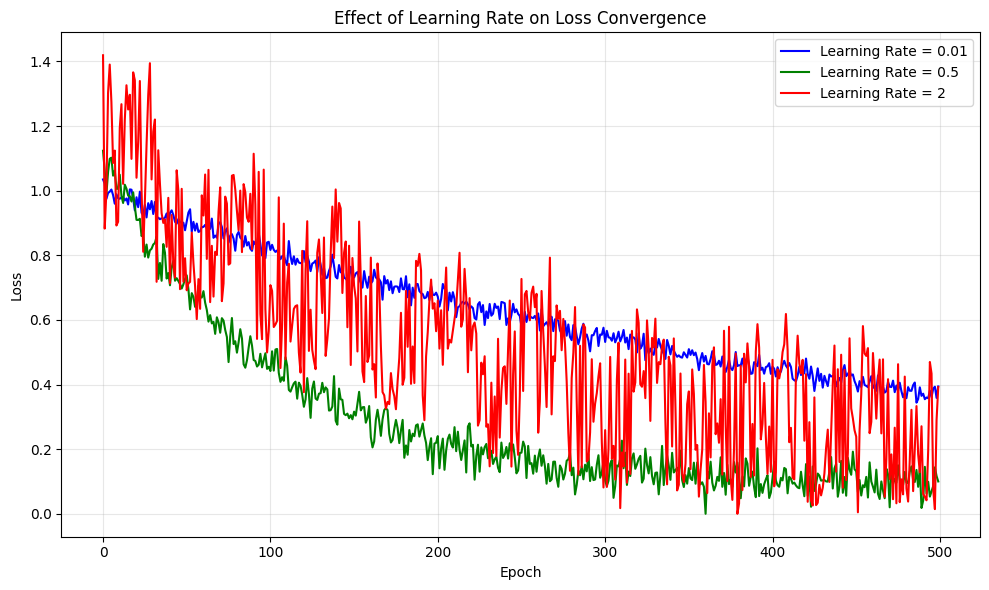

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate "loss" values for 3 different learning rates over 1000 epochs
epochs = np.arange(500)

# Small learning rate: slow, steady decrease, doesn't reach minimum
loss_small = 1.0 * np.exp(-0.002 * epochs) + 0.02 * np.random.randn(len(epochs))

# Good learning rate: fast decrease, smooth convergence to minimum
loss_good = 1.0 * np.exp(-0.01 * epochs) + 0.04 * np.random.randn(len(epochs))

# Large learning rate: irregular oscillations and possible divergence
loss_large = 1.0 * np.exp(-0.005 * epochs) \
    + 0.25 * np.sin(0.1 * epochs + np.random.uniform(-2, 2, len(epochs))) \
    + 0.05 * np.random.randn(len(epochs)) \
    + 0.05 * np.random.randn(len(epochs)).cumsum() / len(epochs)  # add some drift

# Ensure all losses are non-negative by shifting them
# Find the minimum value in each loss array
min_small = loss_small.min()
min_good = loss_good.min()
min_large = loss_large.min()

# Shift each array so its minimum is 0
loss_small -= min_small if min_small < 0 else 0
loss_good -= min_good if min_good < 0 else 0
loss_large -= min_large if min_large < 0 else 0

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_small, label='Learning Rate = 0.01', color='blue')
plt.plot(epochs, loss_good, label='Learning Rate = 0.5', color='green')
plt.plot(epochs, loss_large, label='Learning Rate = 2', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Effect of Learning Rate on Loss Convergence')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

### h) Assume the model was trained on all available training data. In which epoch would you stop the training of the model?
- Are there issues if we continue training for another 500 epochs?

#### Your Answer:

#### Solution:
- Based on the plot above, training more after epoch 300 seems to not improve the performance of the model significantly.
- Continuing training for another 500 epochs could lead to overfitting, where the model learns noise in the training data rather than generalizing well to unseen data.

# Part B: Coding & Visualization

Now let's put our understanding of deep learning algorithms into practice! We'll begin by importing the necessary libraries.

Hint: You may find the provided helper functions useful for some tasks, but you are welcome to write your own

## Notes:
- I'd change the language model task from the handson to a classification task as we done here and then we can showcase all functions etc. there and use them here

In [17]:
# Standard Libraries
import pandas as pd
import numpy as np
import warnings

# Scikit-learn: Data Processing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scikit-learn: Models and Metrics
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Visualization
import matplotlib.pyplot as plt

# UMAP for dimensionality reduction
from umap import UMAP

# Helper Functions
from helper import (
    simple_feature_importance,
    coef_feature_importance,
    evaluate_confusion_matrix,
    evaluate_roc,
    plot_projection
)

import gower

warnings.filterwarnings("ignore")

ImportError: cannot import name 'coef_feature_importance' from 'helper' (c:\Users\janic\OneDrive\Desktop\LLUI Lecture\PNR_Advanced_DataScience\7_Deep_Learning\helper.py)

## 3. Multi-Layer Perceptron (MLP)

### a) Load the dataset `todo.csv` and explore it.
- What outcome do you want to predict? How many classes are available?
- What predictors are available?

In [ ]:
# Student Code


NameError: name 'pd' is not defined

In [29]:
# Solution
df = pd.read_csv('phoneme.csv')

In [30]:
print(df.shape)
df.head()

(4509, 257)


,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,...,x.248,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256,phoneme
0,9.85770,9.20711,9.81689,9.01692,9.05675,8.92518,11.28308,11.52980,10.79713,9.04747,...,12.94519,12.68076,11.20767,13.69394,13.72055,12.16628,12.92489,12.51195,9.75527,sh
1,13.23079,14.19189,15.34428,18.11737,19.53875,18.32726,17.34169,17.16861,19.63557,20.15212,...,8.91567,8.45714,8.77266,9.59717,8.45336,7.57730,5.38504,9.43063,8.59328,iy
2,10.81889,9.07615,9.77940,12.20135,12.59005,10.53364,8.54693,9.46049,11.96755,12.05282,...,6.49345,5.00824,5.51019,5.95725,7.04992,7.02469,6.58416,6.27058,3.85042,dcl
3,10.53679,9.12147,10.84621,13.92331,13.52476,10.27831,8.97459,11.57109,12.35839,10.47826,...,5.36506,5.85688,5.40324,6.07126,5.30651,4.27412,3.63384,3.22823,4.63123,dcl
4,12.96705,13.69454,14.91182,18.22292,18.45390,17.25760,17.79614,17.76387,18.99632,17.40394,...,7.74256,8.00151,7.58624,6.65202,7.69109,6.93683,7.03600,7.01278,8.52197,aa


In [31]:
# Check the features and outcomes
print("Features:")
print(df.columns.tolist())

Features:
['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10', 'x.11', 'x.12', 'x.13', 'x.14', 'x.15', 'x.16', 'x.17', 'x.18', 'x.19', 'x.20', 'x.21', 'x.22', 'x.23', 'x.24', 'x.25', 'x.26', 'x.27', 'x.28', 'x.29', 'x.30', 'x.31', 'x.32', 'x.33', 'x.34', 'x.35', 'x.36', 'x.37', 'x.38', 'x.39', 'x.40', 'x.41', 'x.42', 'x.43', 'x.44', 'x.45', 'x.46', 'x.47', 'x.48', 'x.49', 'x.50', 'x.51', 'x.52', 'x.53', 'x.54', 'x.55', 'x.56', 'x.57', 'x.58', 'x.59', 'x.60', 'x.61', 'x.62', 'x.63', 'x.64', 'x.65', 'x.66', 'x.67', 'x.68', 'x.69', 'x.70', 'x.71', 'x.72', 'x.73', 'x.74', 'x.75', 'x.76', 'x.77', 'x.78', 'x.79', 'x.80', 'x.81', 'x.82', 'x.83', 'x.84', 'x.85', 'x.86', 'x.87', 'x.88', 'x.89', 'x.90', 'x.91', 'x.92', 'x.93', 'x.94', 'x.95', 'x.96', 'x.97', 'x.98', 'x.99', 'x.100', 'x.101', 'x.102', 'x.103', 'x.104', 'x.105', 'x.106', 'x.107', 'x.108', 'x.109', 'x.110', 'x.111', 'x.112', 'x.113', 'x.114', 'x.115', 'x.116', 'x.117', 'x.118', 'x.119', 'x.120', 'x.121', 'x.122',

In [32]:
# Get unique values for categorical features
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in phoneme: ['sh' 'iy' 'dcl' 'aa' 'ao']


In [ ]:
# Prepare data for modeling
X = df.drop(columns=["phoneme"])
y = df["phoneme"]


### b) Prepare the data for the model.

*Initial task:*
- Split it into 80% training and 20% test data.
- Afterwards scale the data

*Note:* I used the functions that were used in the handson.

In [ ]:
# Student Code

In [48]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

def prepare_data_for_mlp(X, y, task_type="regression", scale_target=True):
    """
    Prepares data for training a Multi-Layer Perceptron (MLP) by splitting, scaling, and converting to PyTorch tensors.
    Supports both regression and classification tasks.

    Args:
        X (pd.DataFrame or np.ndarray): Feature matrix of shape (n_samples, n_features).
        y (pd.Series or np.ndarray): Target vector of shape (n_samples,).
        task_type (str): "regression" or "classification".
        scale_target (bool, optional): Whether to scale the target variable (only for regression). Defaults to True.

    Returns:
        tuple: (X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale features
    feature_scaler = StandardScaler()
    X_train_scaled = feature_scaler.fit_transform(X_train)
    X_test_scaled = feature_scaler.transform(X_test)

    # Prepare targets
    if task_type == "classification":
        # Encode labels as integers
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)
        y_train_tensor = torch.LongTensor(y_train_encoded)
        y_test_tensor = torch.LongTensor(y_test_encoded)
    else:
        # Regression: scale targets if requested
        if scale_target:
            target_scaler = StandardScaler()
            y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
            y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1)).flatten()
        else:
            y_train_scaled = y_train.values
            y_test_scaled = y_test.values
        y_train_tensor = torch.FloatTensor(y_train_scaled).reshape(-1, 1)
        y_test_tensor = torch.FloatTensor(y_test_scaled).reshape(-1, 1)

    # Convert features to tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    X_test_tensor = torch.FloatTensor(X_test_scaled)

    print(f"X_train: {X_train_tensor.shape}, y_train: {y_train_tensor.shape}")
    print(f"X_test: {X_test_tensor.shape}, y_test: {y_test_tensor.shape}")

    return X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor

In [49]:
# Prepare data for MLP
#from helper import prepare_data_for_mlp
X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = prepare_data_for_mlp(X, y, task_type='classification')

X_train: torch.Size([3607, 256]), y_train: torch.Size([3607])
X_test: torch.Size([902, 256]), y_test: torch.Size([902])


### c) Build a Multi-Layer Perceptron (MLP) model.

Note 
- Use 1 hidden layer with 100 neurons.
- Use SGD with learning rate 0.001.
- Plot the learning curve (loss over epochs) for both training and test data.
- Did the model learn well?

In [ ]:
# Student Code

In [56]:
# Define Model
from helper import SimpleMLP

input_size = X.shape[1]
output_size = len(y.unique())
hidden_size = 100
layers = 1

model = SimpleMLP(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=layers)

In [57]:
# Train the model with default params
from helper import train_model

learning_rate = 0.001

train_loss, test_loss = train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, learning_rate=learning_rate, task_type='multiclass')

=== DETECTED TASK TYPE: MULTICLASS ===
Multi-class classification setup:
  Loss function: CrossEntropyLoss()
  Number of classes: 5
  Target shape: torch.Size([3607])

Epoch | Train Loss | Test Loss  | LR
---------------------------------------------
    1 |     1.5124 |    1.4304 | 0.001000
   20 |     0.3498 |    0.3759 | 0.001000
   40 |     0.2305 |    0.2564 | 0.001000
   60 |     0.1981 |    0.2245 | 0.001000
   80 |     0.1829 |    0.2104 | 0.001000
  100 |     0.1738 |    0.2023 | 0.001000
  120 |     0.1666 |    0.1969 | 0.001000
  140 |     0.1612 |    0.1930 | 0.001000
  160 |     0.1566 |    0.1901 | 0.001000
  180 |     0.1527 |    0.1880 | 0.001000
  200 |     0.1491 |    0.1864 | 0.001000
Training completed!


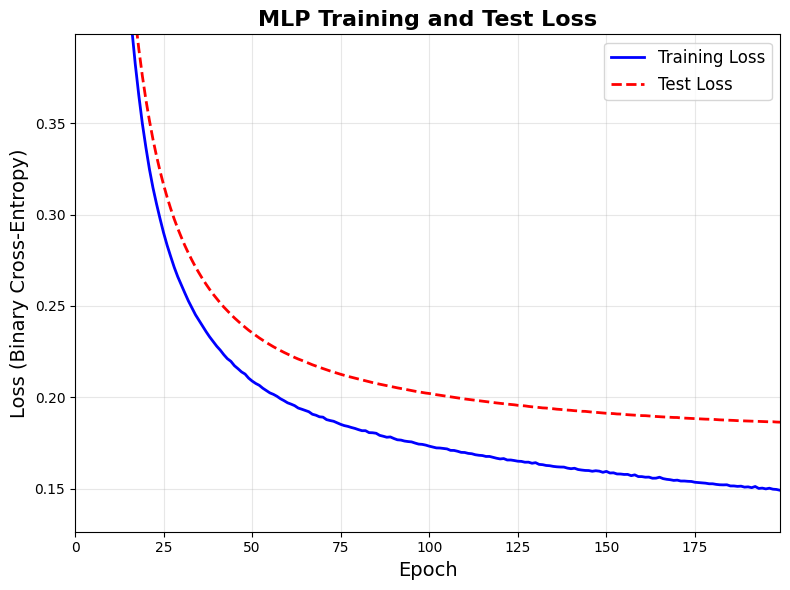

Initial loss: 1.5124
Final loss: 0.1491
Loss reduction: 90.1%


In [58]:
# Plot the learning curve
from helper import plot_training_loss
plot_training_loss(train_loss, test_loss, title='MLP Training and Test Loss')

### d) Now let's compare learning rates.
- Try learning rates of 0.00001, 0.5, and 1.5
- Plot the learning curves for each learning rate.
- Interpret the learning curves, which model did learn best?

In [ ]:
# Student Code

In [59]:
def plot_loss_curves(loss_lists, labels, title="Loss Curves"):
    """
    Plots loss curves for multiple training runs.

    Args:
        loss_lists (list of list): Each inner list contains loss values per epoch for a run.
        labels (list of str): Labels for each loss curve.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    for losses, label in zip(loss_lists, labels):
        plt.plot(losses, label=label)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()

In [60]:
# Solution

results = {f"lr_{learning_rate}": 
           { "model": model, "train_loss": train_loss, "test_loss": test_loss}}
learning_rates = [0.00001, 0.5, 1.5]

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model = SimpleMLP(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=layers)
    train_loss, test_loss = train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, learning_rate=lr, task_type='multiclass')
    results[f"lr_{lr}"] = { "model": model, "train_loss": train_loss, "test_loss": test_loss }


Training with learning rate: 1e-05
=== DETECTED TASK TYPE: MULTICLASS ===
Multi-class classification setup:
  Loss function: CrossEntropyLoss()
  Number of classes: 5
  Target shape: torch.Size([3607])

Epoch | Train Loss | Test Loss  | LR
---------------------------------------------
    1 |     1.6667 |    1.6587 | 0.000010
   20 |     1.6275 |    1.6226 | 0.000010
   40 |     1.5876 |    1.5856 | 0.000010
   60 |     1.5489 |    1.5498 | 0.000010
   80 |     1.5115 |    1.5153 | 0.000010
  100 |     1.4760 |    1.4822 | 0.000010
  120 |     1.4417 |    1.4503 | 0.000010
  140 |     1.4089 |    1.4197 | 0.000010
  160 |     1.3775 |    1.3901 | 0.000010
  180 |     1.3469 |    1.3617 | 0.000010
  200 |     1.3181 |    1.3344 | 0.000010
Training completed!

Training with learning rate: 0.5
=== DETECTED TASK TYPE: MULTICLASS ===
Multi-class classification setup:
  Loss function: CrossEntropyLoss()
  Number of classes: 5
  Target shape: torch.Size([3607])

Epoch | Train Loss | Test Los

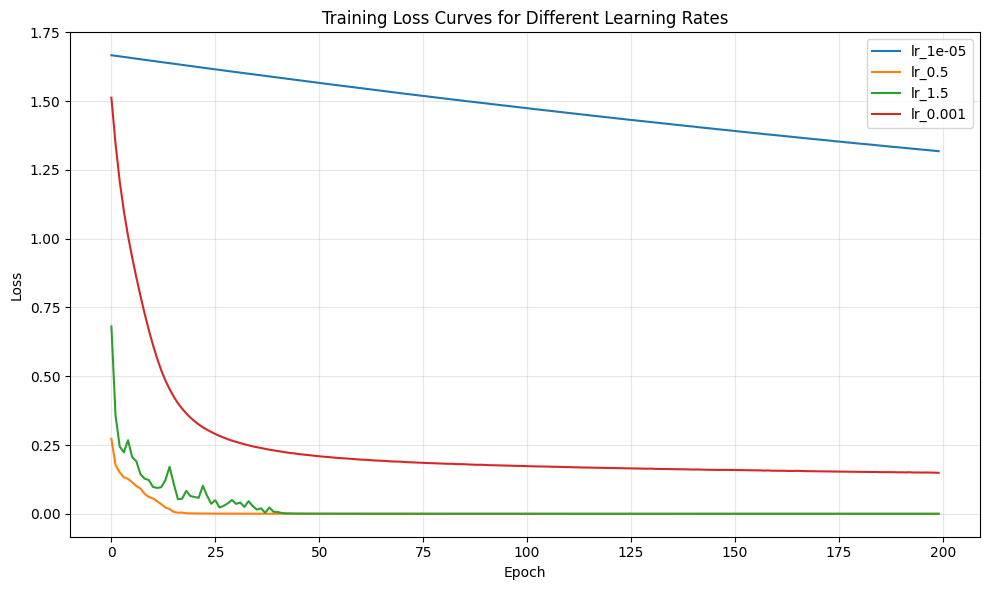

In [61]:
learning_rates.append(learning_rate)  # Include the default learning rate in the list

train_losses = [results[f"lr_{lr}"]["train_loss"] for lr in learning_rates]
plot_loss_curves(train_losses, labels=[f"lr_{lr}" for lr in learning_rates], title = "Training Loss Curves for Different Learning Rates")

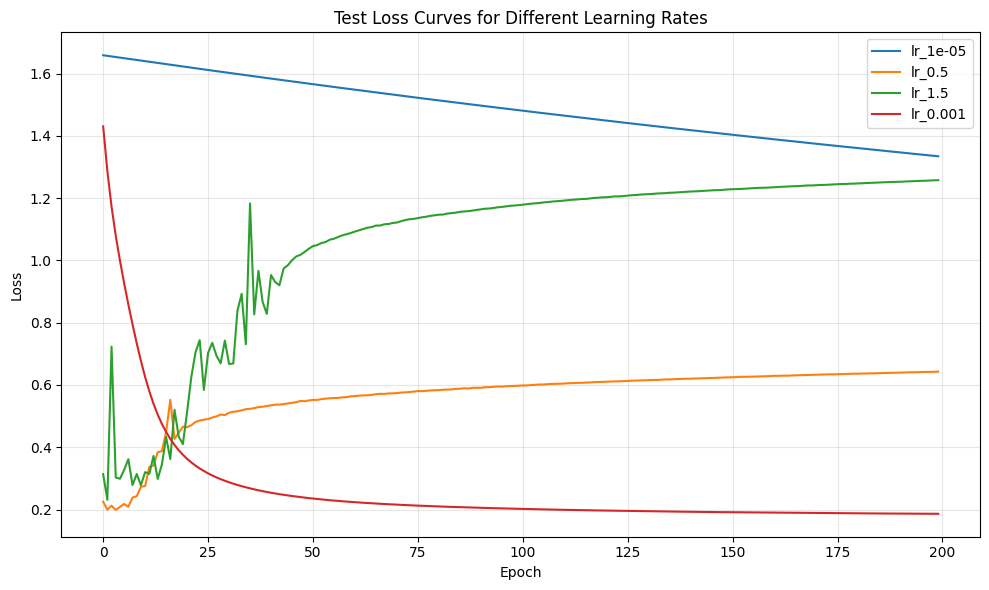

In [62]:
test_losses = [results[f"lr_{lr}"]["test_loss"] for lr in learning_rates]
plot_loss_curves(test_losses, labels=[f"lr_{lr}" for lr in learning_rates], title = "Test Loss Curves for Different Learning Rates")

#### Solution:
The learning curves show that too small learning rates do not converge well, while too large learning rates quickly lead to overfitting. A medium sized learning rate (0.001) provides a good balance, allowing the model to learn effectively without overfitting too quickly.

### e) Let's increase the width (number of neurons) of the hidden layer.
- Use 10000 neurons in the hidden layer.
- Use the best learning rate from the previous task and compare the two models.
- How does the accuracy change?

*Note:* We don't have analyzed the accuracy yet, so you can just compare the loss curves.

In [ ]:
# Student Code

In [69]:
# Define Model
hidde_size = 100000
wide_model = SimpleMLP(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=layers)

In [70]:
# Train model
learning_rate = 0.001
test_loss, train_loss = train_model(wide_model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, learning_rate=learning_rate, task_type='multiclass')

=== DETECTED TASK TYPE: MULTICLASS ===
Multi-class classification setup:
  Loss function: CrossEntropyLoss()
  Number of classes: 5
  Target shape: torch.Size([3607])

Epoch | Train Loss | Test Loss  | LR
---------------------------------------------
    1 |     1.5625 |    1.4694 | 0.001000
   20 |     0.3624 |    0.3856 | 0.001000
   40 |     0.2314 |    0.2554 | 0.001000
   60 |     0.1979 |    0.2217 | 0.001000
   80 |     0.1820 |    0.2068 | 0.001000
  100 |     0.1729 |    0.1982 | 0.001000
  120 |     0.1658 |    0.1926 | 0.001000
  140 |     0.1601 |    0.1887 | 0.001000
  160 |     0.1552 |    0.1857 | 0.001000
  180 |     0.1516 |    0.1836 | 0.001000
  200 |     0.1478 |    0.1820 | 0.001000
Training completed!


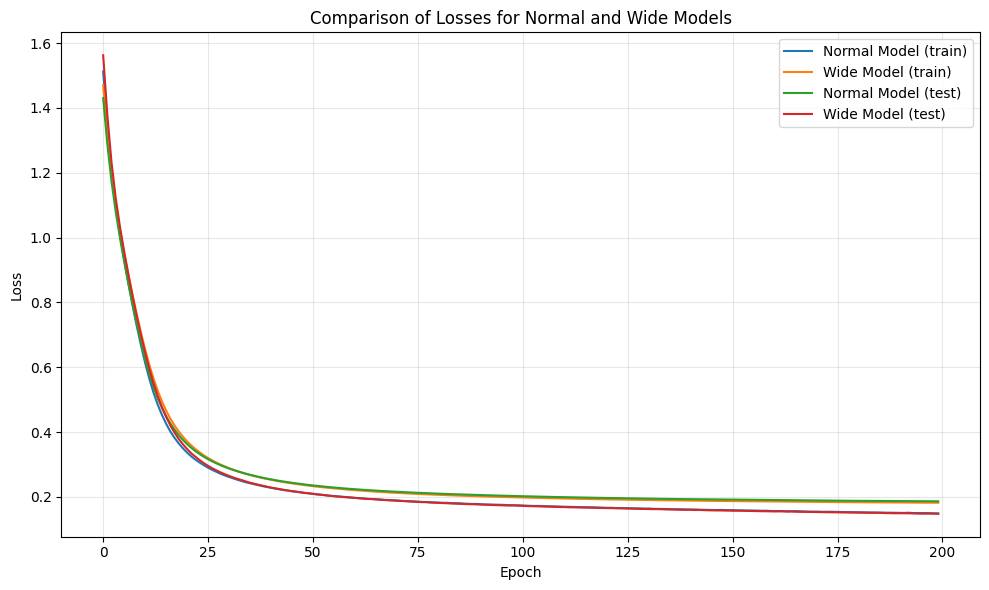

In [71]:
# Plot comparison of losses
losses = [results[f"lr_{learning_rate}"]["train_loss"], train_loss, results[f"lr_{learning_rate}"]["test_loss"], test_loss]
labels = [f"Normal Model (train)", "Wide Model (train)", f"Normal Model (test)", "Wide Model (test)"]

plot_loss_curves(losses, labels=labels, title="Comparison of Losses for Normal and Wide Models")

#### Solution:

Models performed very similar. Seems not to have to big of an impact

### f) Next investigate the depth of the model.
- Fit a new model with three hidden layers with 100 neurons each.
- Compare the initial model to the new one.
- How does the accuracy change?
- Does the new model take longer to train?

In [ ]:
# Student Code

In [66]:
# Define model
num_layers = 3
hidden_size = 100

deep_model = SimpleMLP(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=num_layers)

In [67]:
# Train the model
learning_rate = 0.001
test_loss, train_loss = train_model(deep_model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, learning_rate=learning_rate, task_type='multiclass')

=== DETECTED TASK TYPE: MULTICLASS ===
Multi-class classification setup:
  Loss function: CrossEntropyLoss()
  Number of classes: 5
  Target shape: torch.Size([3607])

Epoch | Train Loss | Test Loss  | LR
---------------------------------------------
    1 |     1.5964 |    1.5869 | 0.001000
   20 |     0.9924 |    1.0077 | 0.001000
   40 |     0.4721 |    0.4905 | 0.001000
   60 |     0.2730 |    0.2924 | 0.001000
   80 |     0.2261 |    0.2441 | 0.001000
  100 |     0.1965 |    0.2161 | 0.001000
  120 |     0.1799 |    0.2018 | 0.001000
  140 |     0.1706 |    0.1949 | 0.001000
  160 |     0.1647 |    0.1904 | 0.001000
  180 |     0.1596 |    0.1873 | 0.001000
  200 |     0.1548 |    0.1849 | 0.001000
Training completed!


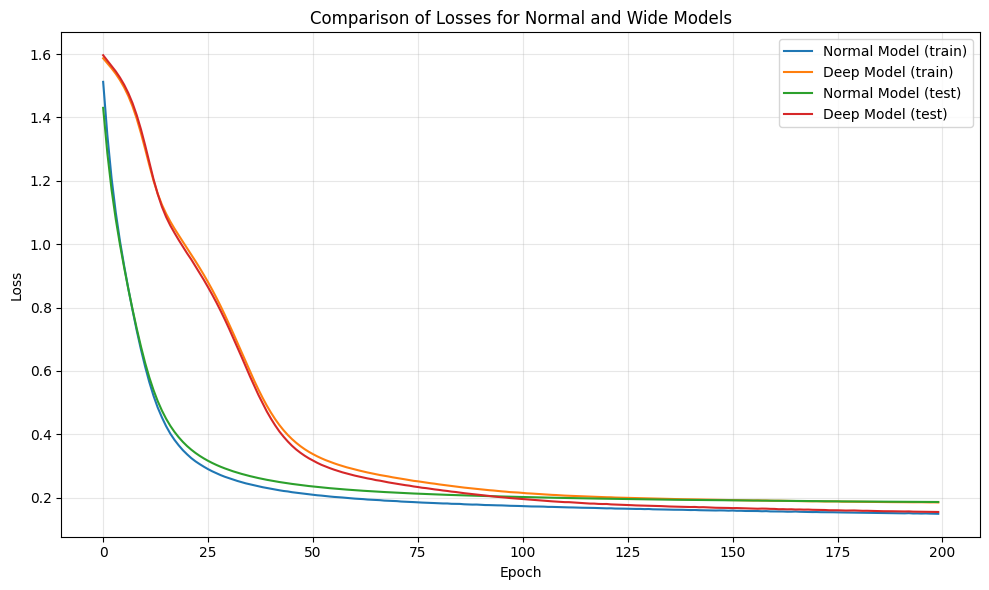

In [68]:
# Plot comparison of losses
losses = [results[f"lr_{learning_rate}"]["train_loss"], train_loss, results[f"lr_{learning_rate}"]["test_loss"], test_loss]
labels = [f"Normal Model (train)", "Deep Model (train)", f"Normal Model (test)", "Deep Model (test)"]

plot_loss_curves(losses, labels=labels, title="Comparison of Losses for Normal and Wide Models")

#### Solution

### g) What can you say about feature importance?
- Is it possible to extract which features are most relevant for the prediction?

*Note:* You don't need to code the feature importance extraction, just discuss the concept.

#### Your Answer:

#### Solution:
In deep learning, feature importance is not as straightforward as in traditional machine learning models like decision trees or linear regression. In general it is difficult, especially for deeper neural networks.

Maybe add a coding part for the students if they're interested.

## 4. Convolutional Neural Networks (CNNs)

### a) Load the dataset `todo_cnn.csv` and explore it.
- What outcome do you want to predict? How many classes are available?
- What predictors are available?


In [ ]:
# Student Code

Loading DermaMNIST dataset...
Full dataset sizes:
Training: 7007 images
Test: 2005 images

Using subset of 800 training images
Test set: 200 images


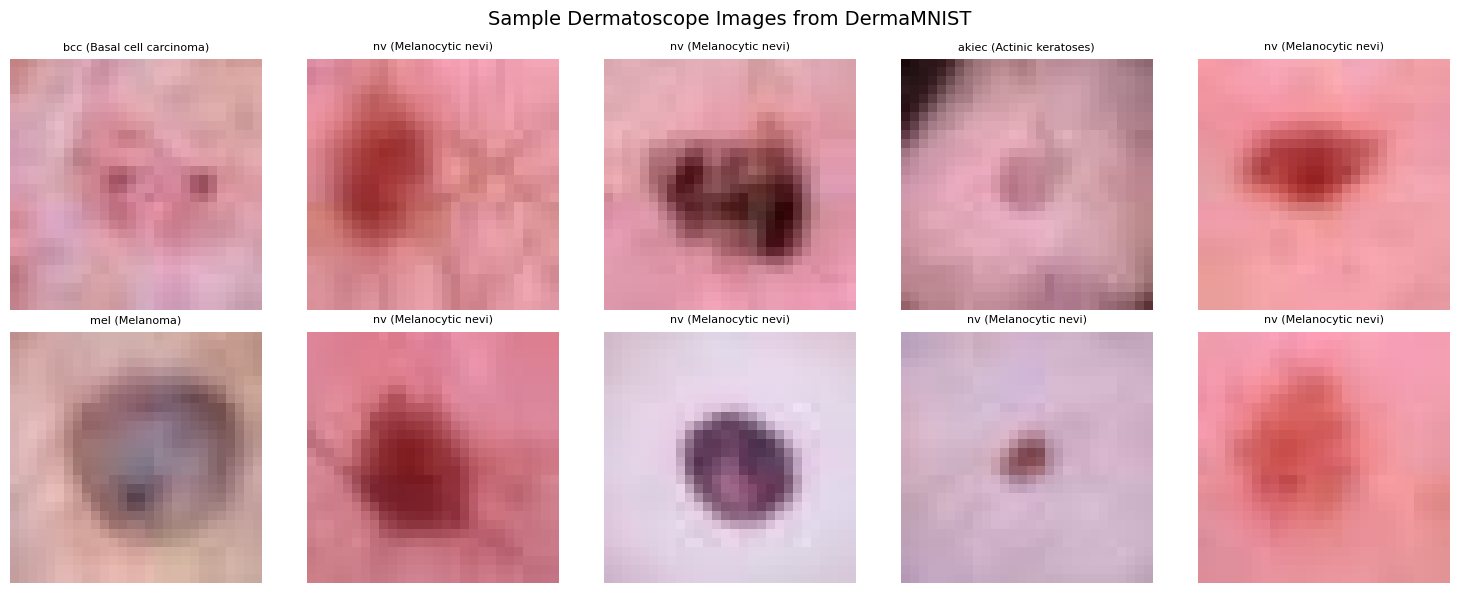

In [155]:
def loadDermaMNIST(train_subset_size=800, test_subset_size=200, transform=None):
    """
    Loads the DermaMNIST dataset, creates random subsets for training and testing, and displays sample images.
    Args:
        train_subset_size (int, optional): Number of images to include in the training subset. Defaults to 800.
        test_subset_size (int, optional): Number of images to include in the test subset. Defaults to 200.
        transform (callable, optional): Optional transform to be applied on a sample. If None, defaults to converting images to tensors.
    Returns:
        tuple: 
            - train_subset (torch.utils.data.Subset): Subset of the training dataset.
            - test_subset (torch.utils.data.Subset): Subset of the test dataset.
            - label_names (dict): Dictionary mapping label indices to label names.
    Displays:
        A matplotlib figure showing 10 sample images from the training subset with their corresponding labels.
    """
    # Load DermaMNIST dataset
    print("Loading DermaMNIST dataset...")
    # Add transforms to convert PIL images to tensors
    from torchvision import transforms
    import random
    import matplotlib.pyplot as plt
    import numpy as np
    from torch.utils.data import Subset
    from medmnist import DermaMNIST
    
    if transform is None:
        transform = transforms.Compose([transforms.ToTensor()])
    
    train_dataset = DermaMNIST(split='train', download=True, transform=transform)
    test_dataset = DermaMNIST(split='test', download=True, transform=transform)

    print(f"Full dataset sizes:")
    print(f"Training: {len(train_dataset)} images")
    print(f"Test: {len(test_dataset)} images")

    # Create subset of training images
    train_subset_indices = random.sample(range(len(train_dataset)), train_subset_size)
    train_subset = Subset(train_dataset, train_subset_indices)

    # Create subset of test images
    test_subset_indices = random.sample(range(len(test_dataset)), test_subset_size)
    test_subset = Subset(test_dataset, test_subset_indices)

    print(f"\nUsing subset of {len(train_subset)} training images")
    print(f"Test set: {len(test_subset)} images")

    # Get label names from the dataset
    label_names = {
        0: "akiec (Actinic keratoses)",
        1: "bcc (Basal cell carcinoma)", 
        2: "bkl (Benign keratosis-like lesions)",
        3: "df (Dermatofibroma)",
        4: "mel (Melanoma)",
        5: "nv (Melanocytic nevi)",
        6: "vasc (Vascular lesions)"
    }

    # Display sample images
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for i in range(10):
        # Get random sample from subset
        idx = train_subset_indices[i]
        image, label = train_dataset[idx]
        
        # Handle different image formats
        if isinstance(image, torch.Tensor):
            if image.shape[0] == 3:  # RGB tensor (3, H, W)
                # Convert from (C, H, W) to (H, W, C) for matplotlib
                image_np = image.permute(1, 2, 0).numpy()
                axes[i].imshow(image_np)
            else:  # Grayscale tensor (1, H, W) or (H, W)
                image_np = image.squeeze().numpy()
                axes[i].imshow(image_np, cmap='gray')
        else:
            # Handle PIL Image case
            axes[i].imshow(image, cmap='gray')
        
        # Convert label to readable format (DermaMNIST uses single-label classification)
        if isinstance(label, torch.Tensor):
            label_idx = int(label.item())
        else:
            # Ensure label_idx is an int, not a numpy array
            if isinstance(label, (list, tuple, np.ndarray)):
                label_idx = int(label[0])
            else:
                label_idx = int(label)

        title = label_names.get(label_idx, f'Class {label_idx}')
        axes[i].set_title(title, fontsize=8)
        axes[i].axis('off')

    plt.suptitle('Sample Dermatoscope Images from DermaMNIST', fontsize=14)
    plt.tight_layout()
    plt.show()

    return train_subset, test_subset, label_names

# Usage
train_subset, test_subset, label_names = loadDermaMNIST(train_subset_size=800, test_subset_size=200)


In [ ]:
# Student Code

### c) Fit a Multi-Layer Perceptron (MLP) model.
- Use 2 hidden layer with 32 neurons.
- Use SGD with learning rate 0.001.
- How good is the accuracy on the test set?

In [ ]:
# Student Code

In [162]:
# Define the MLP
X_train = torch.stack([train_subset[i][0] for i in range(len(train_subset))])
y_train = torch.tensor([train_subset[i][1] for i in range(len(train_subset))])

X_test = torch.stack([test_subset[i][0] for i in range(len(test_subset))])
y_test = torch.tensor([test_subset[i][1] for i in range(len(test_subset))])

input_size = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]  # Flatten the image
output_size = len(torch.unique(y_train))
hidden_size = 256
num_layers = 3

mlp = SimpleMLP(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=num_layers)


In [163]:
# Flatten the data
X_train_flat = X_train.view(X_train.size(0), -1)
X_test_flat = X_test.view(X_test.size(0), -1)


In [164]:
# Train the model
learning_rate = 0.001

train_loss, test_loss = train_model(mlp, X_train_flat, y_train, X_test_flat, y_test, learning_rate=learning_rate, task_type='multiclass')

=== DETECTED TASK TYPE: MULTICLASS ===
Multi-class classification setup:
  Loss function: CrossEntropyLoss()
  Number of classes: 7
  Target shape: torch.Size([800, 1])

Epoch | Train Loss | Test Loss  | LR
---------------------------------------------
    1 |     1.8988 |    1.8803 | 0.001000
   20 |     1.1829 |    1.1800 | 0.001000
   40 |     1.1272 |    1.1277 | 0.001000
   60 |     1.1132 |    1.1183 | 0.001000
   80 |     1.1057 |    1.1134 | 0.001000
  100 |     1.0990 |    1.1087 | 0.001000
  120 |     1.0923 |    1.1034 | 0.001000
  140 |     1.0850 |    1.0966 | 0.001000
  160 |     1.0772 |    1.0883 | 0.001000
  180 |     1.0682 |    1.0796 | 0.001000
  200 |     1.0591 |    1.0708 | 0.001000
Training completed!


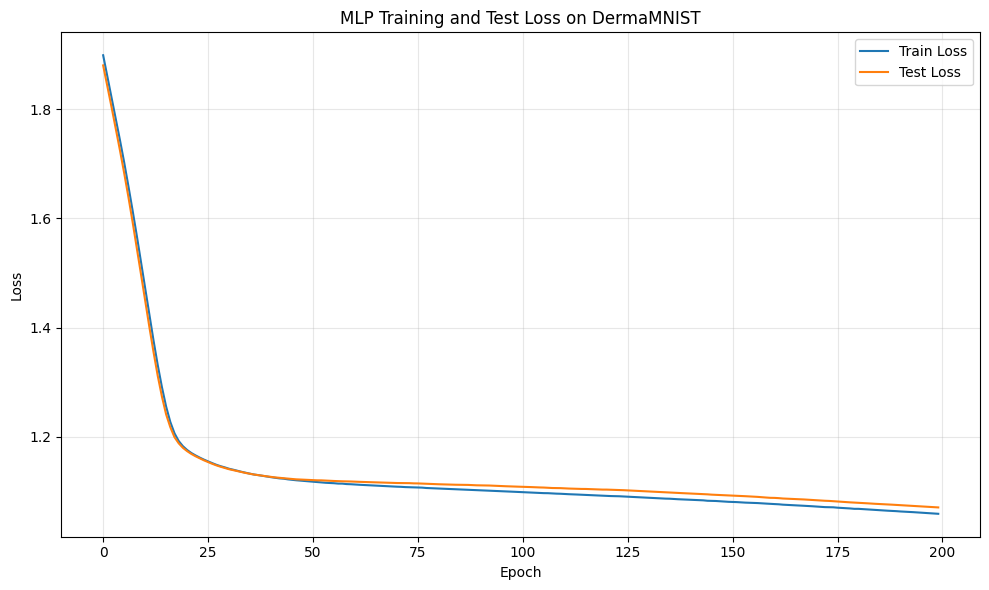

In [170]:
# Plot the learning curve
plot_loss_curves([train_loss, test_loss], ['Train Loss', 'Test Loss'], title='MLP Training and Test Loss on DermaMNIST')

### d) Fit a Convolutional Neural Network (CNN) model.
- *Specify params*

In [ ]:
# Student Code

In [176]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    """
    A configurable simple Convolutional Neural Network (CNN) for image classification tasks.
    This class allows for flexible construction of a CNN with a variable number of convolutional
    and fully connected layers. It also provides utilities for extracting intermediate representations
    and feature maps for visualization and analysis.
    Args:
        input_channels (int): Number of input channels (e.g., 1 for grayscale, 3 for RGB). Default is 1.
        num_conv_layers (int): Number of convolutional layers. Default is 2.
        conv_channels (list of int): List specifying the number of output channels for each conv layer.
            If fewer than `num_conv_layers` are provided, the last value is repeated. Default is [32, 64].
        kernel_size (int): Size of the convolutional kernels. Default is 3.
        padding (int): Padding added to all sides of the input for convolutional layers. Default is 1.
        pool_size (int): Size of the max pooling window. Default is 2.
        pool_stride (int): Stride of the max pooling window. Default is 2.
        num_fc_layers (int): Number of fully connected (dense) layers before the output layer. Default is 2.
        fc_hidden_size (int): Number of units in each hidden fully connected layer. Default is 128.
        output_size (int): Number of output classes. Default is 10.
        input_height (int): Height of the input images. Default is 28.
        input_width (int): Width of the input images. Default is 28.
    Attributes:
        conv_layers (nn.ModuleList): List of convolutional layers.
        pool_layers (nn.ModuleList): List of max pooling layers.
        fc_layers (nn.ModuleList): List of fully connected layers.
        representations (dict): Stores intermediate representations for each layer during forward pass.
        conv_output_size (int): Size of the flattened output after all conv and pooling layers.
    Methods:
        forward(x):
            Performs a forward pass through the network and stores intermediate representations.
        get_representations(x):
            Returns a dictionary of intermediate representations for a given input tensor.
        get_feature_maps(x, layer_name):
            Returns the feature maps from a specific convolutional or pooling layer.
        summary():
            Prints a summary of the network architecture, including layer details and output sizes.
    """
    def __init__(self, input_channels=1, num_conv_layers=2, conv_channels=[32, 64], 
                 kernel_size=3, padding=1, pool_size=2, pool_stride=2,
                 num_fc_layers=2, fc_hidden_size=128, output_size=10, 
                 input_height=28, input_width=28):
        super(SimpleCNN, self).__init__()
        
        self.input_channels = input_channels
        self.num_conv_layers = num_conv_layers
        self.num_fc_layers = num_fc_layers
        self.input_height = input_height
        self.input_width = input_width
        
        # Convolutional layers
        self.conv_layers = nn.ModuleList()
        self.pool_layers = nn.ModuleList()
        
        # Build conv layers
        in_channels = input_channels
        for i in range(num_conv_layers):
            out_channels = conv_channels[i] if i < len(conv_channels) else conv_channels[-1]
            self.conv_layers.append(nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding))
            self.pool_layers.append(nn.MaxPool2d(pool_size, pool_stride))
            in_channels = out_channels
        
        # Calculate the size after conv layers
        self.conv_output_size = self._calculate_conv_output_size()
        
        # Fully connected layers
        self.fc_layers = nn.ModuleList()
        
        if num_fc_layers > 0:
            # First FC layer (after flattening)
            self.fc_layers.append(nn.Linear(self.conv_output_size, fc_hidden_size))
            
            # Additional hidden FC layers
            for i in range(1, num_fc_layers):
                self.fc_layers.append(nn.Linear(fc_hidden_size, fc_hidden_size))
            
            # Output layer
            self.fc_layers.append(nn.Linear(fc_hidden_size, output_size))
        else:
            # Direct conv to output
            self.fc_layers.append(nn.Linear(self.conv_output_size, output_size))
        
        # Store intermediate representations
        self.representations = {}
    
    def _calculate_conv_output_size(self):
        """Calculate the output size after all conv and pooling layers"""
        with torch.no_grad():
            # Use instance attributes for dummy input
            dummy_input = torch.zeros(
                1, self.input_channels, self.input_height, self.input_width
            )
            
            x = dummy_input
            for i in range(self.num_conv_layers):
                x = self.pool_layers[i](F.relu(self.conv_layers[i](x)))
            
            return x.view(1, -1).size(1)
    
    def forward(self, x):
        """Forward pass with ReLU activation"""
        # Store input representation
        self.representations['input'] = x
        
        current_x = x
        
        # Convolutional layers
        for i in range(self.num_conv_layers):
            current_x = F.relu(self.conv_layers[i](current_x))
            self.representations[f'conv{i+1}'] = current_x
            
            current_x = self.pool_layers[i](current_x)
            self.representations[f'pool{i+1}'] = current_x
        
        # Flatten for FC layers
        flattened = current_x.view(current_x.size(0), -1)
        self.representations['flattened'] = flattened
        
        current_x = flattened
        
        # Fully connected layers (except output)
        for i in range(self.num_fc_layers):
            current_x = F.relu(self.fc_layers[i](current_x))
            self.representations[f'fc{i+1}'] = current_x
        
        # Output layer (no activation)
        if self.num_fc_layers > 0:
            output = self.fc_layers[-1](current_x)
        else:
            output = self.fc_layers[0](current_x)
        
        self.representations['output'] = output
        
        return output
    
    def get_representations(self, x):
        """Get intermediate representations for visualization"""
        with torch.no_grad():
            output = self.forward(x)
            # Convert to numpy for easy plotting
            representations = {}
            for key, value in self.representations.items():
                if value.dim() > 2:  # For conv layers, keep shape info
                    representations[key] = value.cpu().numpy()
                else:  # For FC layers, flatten if needed
                    representations[key] = value.cpu().numpy()
            return representations

    def get_feature_maps(self, x, layer_name):
        """Get feature maps from a specific convolutional layer"""
        with torch.no_grad():
            self.forward(x)
            if layer_name in self.representations:
                return self.representations[layer_name].cpu().numpy()
            else:
                available_layers = list(self.representations.keys())
                raise ValueError(f"Layer {layer_name} not found. Available layers: {available_layers}")

    def summary(self):
        """Print network architecture summary"""
        print("SimpleCNN Architecture:")
        print(f"Input shape: ({self.input_height}, {self.input_width})")
        print("\nConvolutional Layers:")
        for i, conv in enumerate(self.conv_layers):
            print(f"  Conv{i+1}: {conv}")
            print(f"  Pool{i+1}: {self.pool_layers[i]}")
        
        print(f"\nFlattened size: {self.conv_output_size}")
        print("\nFully Connected Layers:")
        for i, fc in enumerate(self.fc_layers):
            print(f"  FC{i+1}: {fc}")

In [177]:
# Define the CNN
#from helper import SimpleCNN

cnn = SimpleCNN(input_channels=3, output_size=output_size)

In [178]:
# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Move model to device
cnn_model = cnn.to(device)

Using device: cpu


In [ ]:
# We should add a function that can do this maybe
# Train the CNN model
train_loss, test_loss = train_model(cnn_model, X_train, y_train, X_test, y_test, learning_rate=learning_rate, task_type='multiclass')

=== DETECTED TASK TYPE: MULTICLASS ===
Multi-class classification setup:
  Loss function: CrossEntropyLoss()
  Number of classes: 7
  Target shape: torch.Size([800, 1])

Epoch | Train Loss | Test Loss  | LR
---------------------------------------------
    1 |     1.9617 |    1.9531 | 0.001000
   20 |     1.4308 |    1.4078 | 0.001000
   40 |     1.1430 |    1.1385 | 0.001000
   60 |     1.1224 |    1.1227 | 0.001000
   80 |     1.1156 |    1.1201 | 0.001000
  100 |     1.1119 |    1.1189 | 0.001000
  120 |     1.1088 |    1.1173 | 0.001000
  140 |     1.1063 |    1.1159 | 0.001000
  160 |     1.1035 |    1.1137 | 0.001000
  180 |     1.1012 |    1.1116 | 0.001000
  200 |     1.0981 |    1.1085 | 0.001000
Training completed!


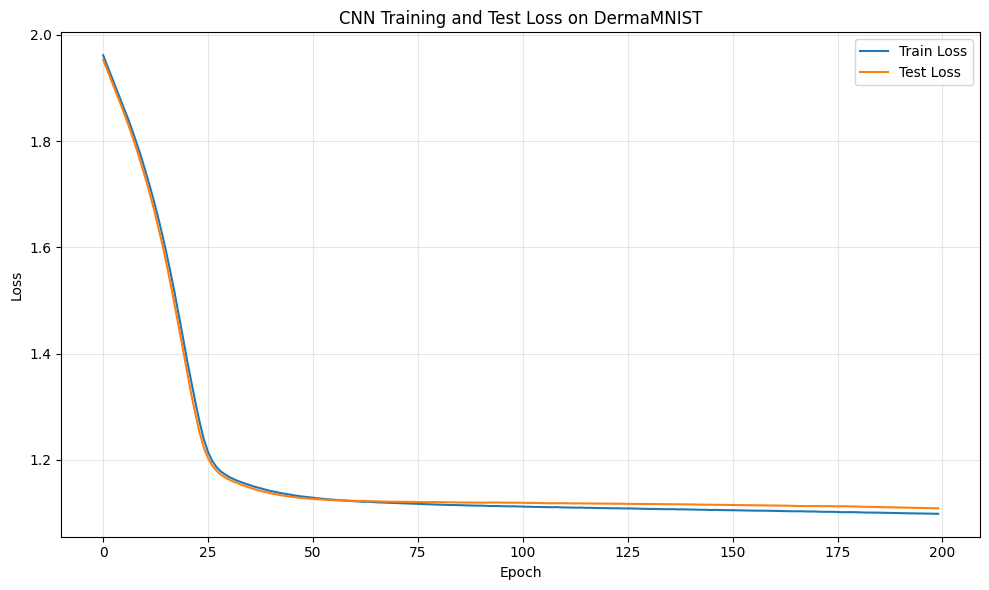

In [180]:
# Plot the learning curve
plot_loss_curves([train_loss, test_loss], ['Train Loss', 'Test Loss'], title='CNN Training and Test Loss on DermaMNIST')

### e) Visualize intermediate representations of the CNN.
- What do you observe? Are there any patterns in the feature maps?

In [ ]:
# Student Code

In [181]:
# Solution:
from helper import get_sample
image, title = get_sample(train_subset, label_names)

Analyzing Dermathological Condition: Normal
Conv1 feature maps shape: (32, 28, 28)
Conv2 feature maps shape: (64, 14, 14)


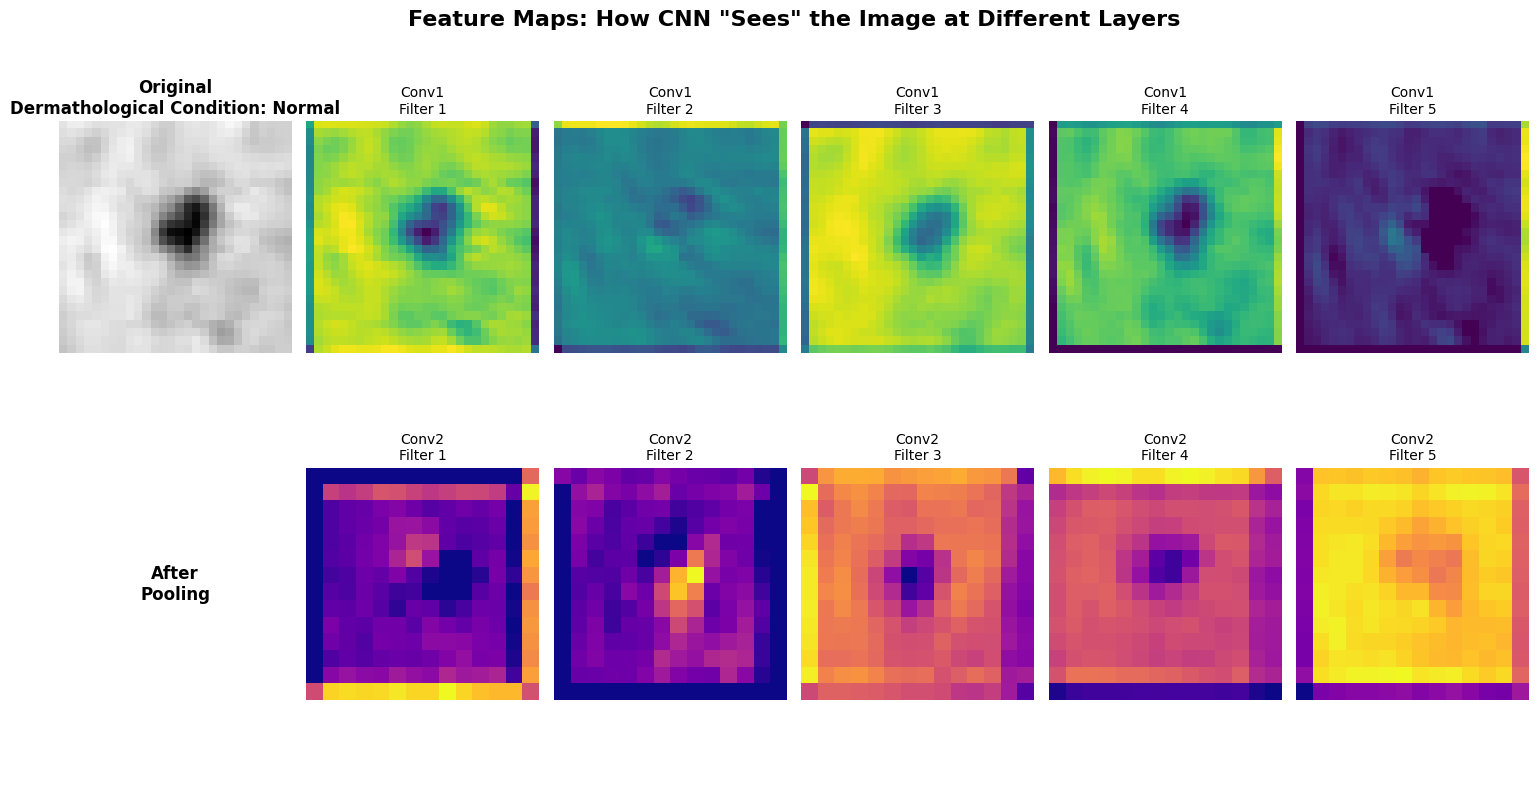

In [182]:
from helper import extract_and_plot_feature_maps
extract_and_plot_feature_maps(cnn_model, image, title, category_name="Dermathological Condition")

In [194]:
from sklearn.manifold import MDS
def visualize_cnn_representations(model, X_test_tensor, y_test_tensor, num_samples=500):
    """
    Visualizes the internal representations of a CNN model at different layers using MDS.
    This function extracts and visualizes the representations from three layers of a CNN model:
    - Flattened convolutional features
    - First fully connected (FC1) layer
    - Second fully connected (FC2) layer (pre-softmax logits)
    For each layer, the high-dimensional representations are standardized and projected to 2D using
    Multidimensional Scaling (MDS). The resulting 2D embeddings are plotted in a three-panel figure,
    colored by digit class.
    Args:
        model: The trained CNN model with a `get_representations` method that returns a dictionary
            containing 'flattened', 'fc1', and 'fc2' representations for a batch of input data.
        X_test_tensor (torch.Tensor): Test set input data as a tensor.
        y_test_tensor (torch.Tensor): Test set labels as a tensor.
        num_samples (int, optional): Number of test samples to use for visualization. Defaults to 500.
    Returns:
        None. Displays a matplotlib figure with three subplots visualizing the 2D embeddings of the
        representations from each layer.
    """
    # Use a subset of test data for visualization (500 samples for speed)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    n_samples = min(num_samples, len(X_test_tensor))
    indices = np.random.choice(len(X_test_tensor), n_samples, replace=False)
    sample_data = X_test_tensor[indices].to(device)
    sample_labels = y_test_tensor[indices].cpu().numpy()

    # Get representations
    representations = model.get_representations(sample_data)

    print(f"Analyzing {n_samples} test samples")
    print(f"Flattened conv features: {representations['flattened'].shape}")
    print(f"FC1 representations: {representations['fc1'].shape}")
    print(f"FC2 representations: {representations['fc2'].shape}")

    # Standardize and apply MDS to all three representations
    scaler_flat = StandardScaler()
    flat_scaled = scaler_flat.fit_transform(representations['flattened'])
    mds_flat = MDS(n_components=2, random_state=42, normalized_stress='auto')
    flat_2d = mds_flat.fit_transform(flat_scaled)

    scaler_fc1 = StandardScaler()
    fc1_scaled = scaler_fc1.fit_transform(representations['fc1'])
    mds_fc1 = MDS(n_components=2, random_state=42, normalized_stress='auto')
    fc1_2d = mds_fc1.fit_transform(fc1_scaled)

    scaler_fc2 = StandardScaler()
    fc2_scaled = scaler_fc2.fit_transform(representations['fc2'])
    mds_fc2 = MDS(n_components=2, random_state=42, normalized_stress='auto')
    fc2_2d = mds_fc2.fit_transform(fc2_scaled)

    # Create three-panel visualization
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    colors = plt.cm.tab10(np.arange(len(np.unique(sample_labels))))

    # Flattened conv representations
    for label in range(len(np.unique(sample_labels))):
        mask = sample_labels == label
        print(label)
        print(mask)
        if np.any(mask):
            ax1.scatter(flat_2d[mask, 0], flat_2d[mask, 1], 
                    c=[colors[label]], s=20, alpha=0.6, 
                    label=f'Digit {label}')

    ax1.set_xlabel('MDS Dimension 1', fontsize=12)
    ax1.set_ylabel('MDS Dimension 2', fontsize=12)
    ax1.set_title('Flattened Conv Features\n(3136D → 2D, Raw Conv Output)', 
                fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # FC1 representations
    for label in range(len(np.unique(sample_labels))):
        mask = sample_labels == label
        if np.any(mask):
            ax2.scatter(fc1_2d[mask, 0], fc1_2d[mask, 1], 
                    c=[colors[label]], s=20, alpha=0.6, 
                    label=f'Digit {label}')

    ax2.set_xlabel('MDS Dimension 1', fontsize=12)
    ax2.set_ylabel('MDS Dimension 2', fontsize=12)
    ax2.set_title('FC1 Layer Representations\n(128D → 2D, Intermediate Features)', 
                fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)

    # FC2 representations (pre-softmax logits)
    for label in range(len(np.unique(sample_labels))):
        mask = sample_labels == label
        if np.any(mask):
            ax3.scatter(fc2_2d[mask, 0], fc2_2d[mask, 1], 
                    c=[colors[label]], s=20, alpha=0.6, 
                    label=f'Digit {label}')

    ax3.set_xlabel('MDS Dimension 1', fontsize=12)
    ax3.set_ylabel('MDS Dimension 2', fontsize=12)
    ax3.set_title('FC2 Layer Representations\n(128D → 2D, Second Intermediate Features)', 
                fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)

    # Single legend
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left')

    plt.tight_layout()
    plt.show()

torch.Size([200, 1])
Analyzing 100 test samples
Flattened conv features: (100, 3136)
FC1 representations: (100, 128)
FC2 representations: (100, 128)
0
[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [F

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

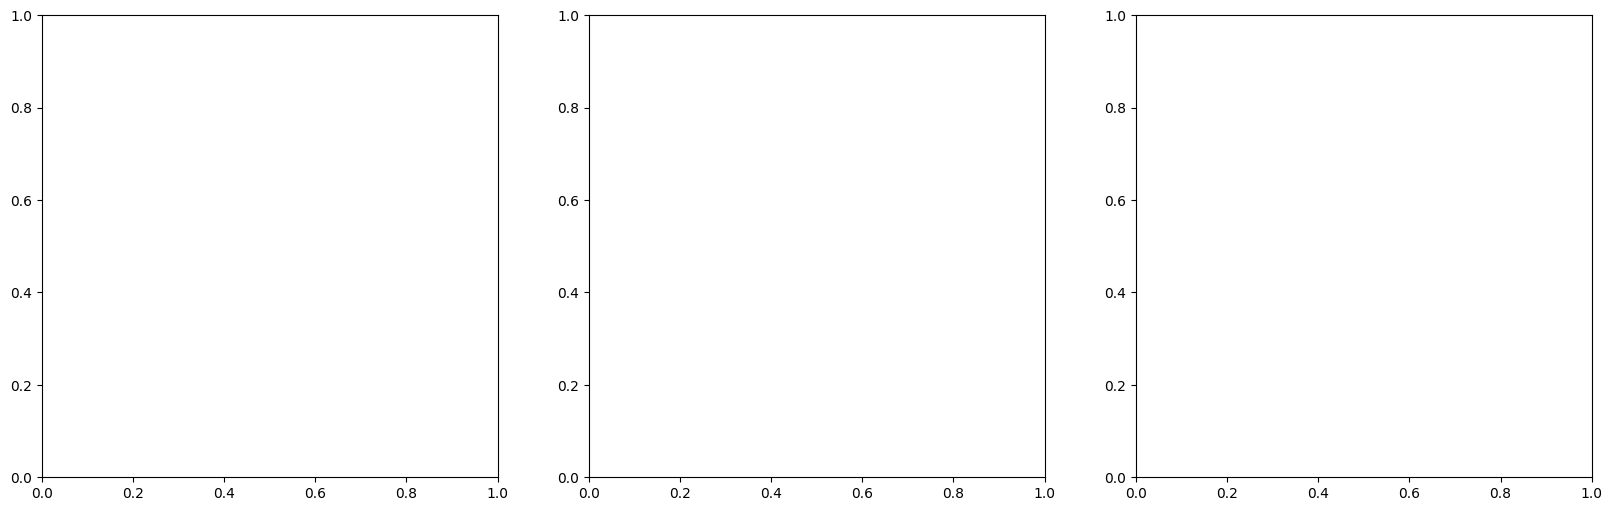

In [197]:
#from helper import visualize_cnn_representations
print(y_test.shape)
visualize_cnn_representations(cnn_model, X_test, y_test, num_samples=100)

### f) Now do the same for the MLP model.
- Do you see differences in the representations?

In [ ]:
# Student Code

In [ ]:
# Solution:

### g) Let's leverage pretrained models.
- Use a pretrained CNN model (*specify*), and try to adapt it to the dataset.

In [ ]:
# Student Code

In [ ]:
# get a model
import timm
efficientnet_model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=7)
efficientnet_model = efficientnet_model.to(device)

In [ ]:
# Transform the data for EfficientNet

transform_efficientnet = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to EfficientNet input size
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3-channel
    transforms.ToTensor(),  # Convert back to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])

# TODO: Define this function
train_dataset_eff, test_dataset_eff, labels = loadDermaMNIST(transform=transform_efficientnet)

print(f"Train dataset size: {len(train_dataset_eff)}")
print(f"Test dataset size: {len(test_dataset_eff)}")

### h) Fine-Tune the pretrained model.
- How does the accuracy change compared to the previous models?

In [ ]:
# Student Code

In [ ]:
# 3. Training configuration
batch_size = 64  # Smaller batch size for EfficientNet (larger images)
learning_rate = 0.001
num_epochs = 15

# Create data loaders
train_loader_eff = DataLoader(train_dataset_eff, batch_size=batch_size, shuffle=True)
test_loader_eff = DataLoader(test_dataset_eff, batch_size=batch_size, shuffle=False)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Multi-label classification
optimizer = optim.Adam(efficientnet_model.parameters(), lr=learning_rate)

print(f"Training Configuration:")
print(f"Batch size: {batch_size}")
print(f"Learning rate: {learning_rate}")
print(f"Number of epochs: {num_epochs}")
print(f"Optimizer: Adam with weight decay")
print(f"Loss function: BCEWithLogitsLoss")

In [ ]:
# Maybe use these training functions for training the cnn, could also be used for mnist
def train_epoch_efficient(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    num_batches = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.float().to(device)
        
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        num_batches += 1
        
        # Print progress every 50 batches
        if batch_idx % 50 == 0:
            print(f'  Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
    
    return running_loss / num_batches

def evaluate_epoch(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0.0
    num_batches = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.float().to(device)
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()
            num_batches += 1
    
    return test_loss / num_batches

In [ ]:
# 4. Training loop
print(f"\nStarting EfficientNet fine-tuning...")
print("=" * 60)
print("Epoch | Train Loss | Test Loss | Time")
print("-" * 60)

efficientnet_train_losses = []
efficientnet_test_losses = []
best_test_loss = float('inf')

for epoch in range(1, num_epochs + 1):
    start_time = time.time()
    
    # Training
    efficientnet_model.train()
    running_loss = 0.0
    num_batches = 0
    
    for batch_idx, (data, target) in enumerate(train_loader_eff):
        data, target = data.to(device), target.float().to(device)
        
        optimizer.zero_grad()
        output = efficientnet_model(data)
        loss = criterion(output, target)
        loss.backward()
        
        # Gradient clipping to prevent exploding gradients
        # torch.nn.utils.clip_grad_norm_(efficientnet_model.parameters(), max_norm=1.0)
        
        optimizer.step()
        
        running_loss += loss.item()
        num_batches += 1
        
    train_loss = running_loss / num_batches
    
    # Evaluation
    efficientnet_model.eval()
    running_test_loss = 0.0
    num_batches = 0
    
    with torch.no_grad():
        for data, target in test_loader_eff:
            data, target = data.to(device), target.float().to(device)
            output = efficientnet_model(data)
            loss = criterion(output, target)
            running_test_loss += loss.item()
            num_batches += 1
    
    test_loss = running_test_loss / num_batches
    
    # Store losses
    efficientnet_train_losses.append(train_loss)
    efficientnet_test_losses.append(test_loss)
    
    # Print epoch summary
    epoch_time = time.time() - start_time
    print(f"{epoch:5d} | {train_loss:10.4f} | {test_loss:9.4f} | {epoch_time:.1f}s")
    print("-" * 60)

print("EfficientNet fine-tuning completed!")
print(f"Best test loss achieved: {best_test_loss:.4f}")

In [ ]:
# Evaluate model

## 5. Text Language Models

TODO: 
Maybe in this case it would make sense to change the example that is currently used in the deep learning handson (there we use a qa model that gives you answers based on a context)

### a) Load the dataset `suicidal_ideation_detection.csv` and explore it.
- What outcome do you want to predict? How many classes are available?
- What predictors are available?

In [ ]:
# Student Code

In [111]:
# Solution
df = pd.read_csv('suicidal_ideation_detection.csv')

In [112]:
print(df.shape)
df.head()

(15477, 2)


,Label,text
0,Non-Suicidal,I'm looking for a girl I've met at the Polish ...
1,Non-Suicidal,I got a guy kicked off a domestic flight today...
2,Non-Suicidal,"My youngest got in school suspension, I’m so p..."
3,Non-Suicidal,"I'm a cashier who switched from ""sir/mam"" to ""..."
4,Non-Suicidal,My whole class complimented me and didn’t real...


In [113]:
# Check for categorical features and their values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15477 entries, 0 to 15476
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   15477 non-null  object
 1   text    15477 non-null  object
dtypes: object(2)
memory usage: 242.0+ KB
None


In [114]:
print(df['Label'].unique())
print(df['Label'].value_counts())

['Non-Suicidal' 'Suicidal']
Label
Non-Suicidal    8202
Suicidal        7275
Name: count, dtype: int64


In [115]:
# Prepare data for modeling
X = df.drop(columns=["Label"])["text"].tolist()
y = df["Label"].tolist()

### b) Split dataset into train and test data.
- Split it into 80% training and 20% test data.

In [116]:
# Student Code

In [127]:
# Solution:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ...existing code...
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

### c) Load a pretrained language model (e.g., BERT, GPT-2).
- *Specify* the model you want to use.
- Tokenize the text data and prepare it for the model.

In [128]:
# Student Code

In [138]:
# Load tokenizer and model
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Use MiniLM for faster inference than DistilBERT
tokenizer = AutoTokenizer.from_pretrained("nreimers/MiniLM-L6-H384-uncased")
model = AutoModelForSequenceClassification.from_pretrained(
    "nreimers/MiniLM-L6-H384-uncased", num_labels=len(set(df["Label"]))
)

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

c:\Users\janic\OneDrive\Desktop\LLUI Lecture\.conda\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\janic\.cache\huggingface\hub\models--nreimers--MiniLM-L6-H384-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nreimers/MiniLM-L6-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [139]:
# Tokenize train and test texts
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=128)

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

### d) Create the dataset such that we can train it
- Use the model to predict the classes in the dataset.

In [140]:
# Student Code

In [141]:
# Solution:

In [142]:
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = TextDataset(train_encodings, y_train)
test_dataset = TextDataset(test_encodings, y_test)

In [143]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

### e) Now let's train the model on the dataset.
- Plot the learning curve (loss over epochs) for both training and test data.
- Report the accuracy and confusion matrix.

In [144]:
# Student Code

In [145]:
import torch
from torch.optim import AdamW
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 3

train_losses = []
eval_losses = []

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for batch_idx, batch in enumerate(tqdm(train_loader)):
        optimizer.zero_grad()
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
        # Print every 10th batch loss
        if (batch_idx + 1) % 10 == 0:
            print(f"Train Epoch {epoch+1}, Batch Loss: {loss.item():.4f}")
    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    total_eval_loss = 0
    with torch.no_grad():
        for batch_idx, batch in enumerate(test_loader):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            total_eval_loss += loss.item()
            if (batch_idx + 1) % 10 == 0:
                print(f"Test Epoch {epoch+1}, Batch Loss: {loss.item():.4f}")
    avg_eval_loss = total_eval_loss / len(test_loader)
    eval_losses.append(avg_eval_loss)

    print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.4f}, Eval Loss={avg_eval_loss:.4f}")

# Plot learning curves
plot_loss_curves([train_losses, eval_losses], labels=["Train Loss", "Eval Loss"], title="DistilBERT Training and Evaluation Loss")

100%|██████████| 774/774 [21:32<00:00,  1.67s/it]


Epoch 1: Train Loss=0.2601, Eval Loss=0.1441


  0%|          | 2/774 [00:04<31:39,  2.46s/it]


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def evaluate_confusion_matrix_pytorch(model, dataloader, label_encoder, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in dataloader:
            labels = batch['labels'].cpu().numpy()
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            outputs = model(**inputs)
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels)
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix - Transformer Model')
    plt.tight_layout()
    plt.show()
    print("CONFUSION MATRIX")
    print("=" * 30)
    print(cm)
    accuracy = (cm.diagonal().sum() / cm.sum())
    print(f"\nAccuracy: {accuracy:.2%}")

In [ ]:
# Report the confusion matrix
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
evaluate_confusion_matrix_pytorch(model, test_loader, label_encoder, device)

### f) Interpret the results. Would you trust such a model?

#### Your Answer:

#### Solution:
Trust in the model depends on its accuracy, confusion matrix, and the context of use. If the model shows high accuracy and balanced performance across all classes (few false positives/negatives), it may be suitable for supporting decisions. However, for sensitive tasks like suicidal ideation detection, I would not fully trust the model without further validation, explainability, and human oversight. Models can make mistakes, and ethical considerations are critical. Always use such models as decision support, not as the sole decision-maker.